In [12]:
import matplotlib.pyplot as plt 
import numpy as np
import random
import shap

exp_id = np.load('exp_id.npy')
exec(open("model_architecture.py").read())

net2 = torch.load('F'+ str(exp_id) +'_net2.pt')
deep_feat = torch.load('D1_F'+str(exp_id)+'_test_fusion_tensor.pt').double().to(device)

In [17]:
net2.eval()
X = deep_feat.cpu().numpy() 

def f(X):
    Xt = torch.from_numpy(X).double().to(device)
    predict_prob = net2(Xt[:, 0:10], Xt[:, 10:20], Xt[: , 20:40])
    return predict_prob.detach().cpu().numpy()[:,0]

explainer = shap.KernelExplainer(f, shap.sample(X, 150))
idx = random.sample(range(0, len(X)), 500)
shap_values = explainer.shap_values(X[idx,:], nsamples=250)

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

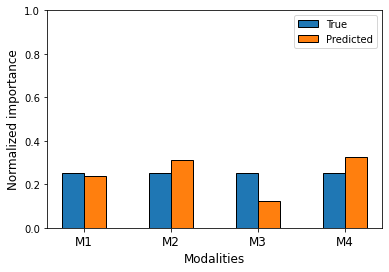

In [18]:
imp = np.mean(shap_values,0)

imp_m1 = np.abs(np.sum(imp[0:10]))
imp_m2 = np.abs(np.sum(imp[10:20]))
imp_m3 = np.abs(np.sum(imp[20:30]))
imp_m4 = np.abs(np.sum(imp[30:40]))

imp_m = np.array( [ imp_m1, imp_m2, imp_m3, imp_m4] ) 
imp_m = imp_m/sum(imp_m)
imp_GT = np.load('F'+str(exp_id)+'_imp_gt.npy')

xlabel = ['M1', 'M2','M3','M4']
plt.bar([0-0.125,1-0.125,2-0.125,3-0.125], imp_GT,  edgecolor='k', width=0.25, capsize=2,  label='True')
plt.bar([0+0.125,1+0.125,2+0.125,3+0.125], imp_m,  edgecolor='k', width=0.25, capsize=2,  label='Predicted')
plt.xticks([0,1,2,3],xlabel,fontsize=12)
plt.xlabel('Modalities',fontsize=12)
plt.ylabel('Normalized importance',fontsize=12)
plt.ylim([0,1])
plt.legend()
plt.grid

np.save('F'+str(exp_id)+'_imp_shap', imp_m)